<a href="https://colab.research.google.com/github/AlanCaste/Data-Analisis/blob/master/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Proyecto/ks-projects-201801-h.csv', index_col=0)
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
state_projects = df['state'].value_counts()
projects_porcentajes = state_projects * 100 / state_projects.sum()
projects_porcentajes

failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64

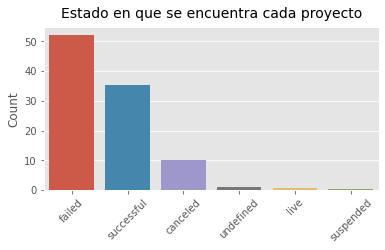

In [ ]:
fig = plt.figure(figsize=(6,3))
plt.style.use('ggplot')
state = sns.barplot( projects_porcentajes.index, projects_porcentajes)
state.set_title('Estado en que se encuentra cada proyecto', fontsize=14, pad=9)
state.set_ylabel('Count')
state.set_xticklabels(state.get_xticklabels(), rotation=45);


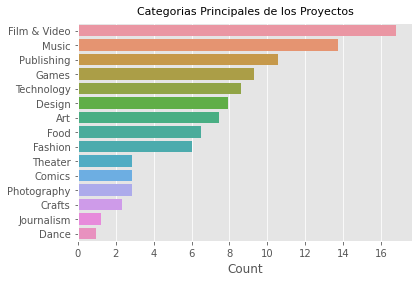

In [ ]:
fig = plt.figure(figsize=(6,4))
categorias_principales = df['main_category'].value_counts()
categorias_porcentaje = categorias_principales * 100 / categorias_principales.sum()
ax_1 =sns.barplot(categorias_porcentaje, categorias_porcentaje.index, orient='h')
ax_1.set_title('Categorias Principales de los Proyectos', fontsize= 11, pad= 9)
ax_1.set_xlabel('Count');


In [ ]:
crosstab = pd.crosstab(df['main_category'], df['state'])
crosstab


state,canceled,failed,live,successful,suspended,undefined
main_category,,,,,,
Art,2222,14131,194,11510,96,0
Comics,842,4036,76,5842,23,0
Crafts,843,5703,76,2115,72,0
Dance,163,1235,18,2338,13,1
Design,4152,14814,305,10550,247,2
Fashion,2650,14182,250,5593,138,3
Film & Video,5755,32904,332,23623,117,854
Food,2211,15969,184,6085,153,0
Games,6202,16003,287,12518,220,1


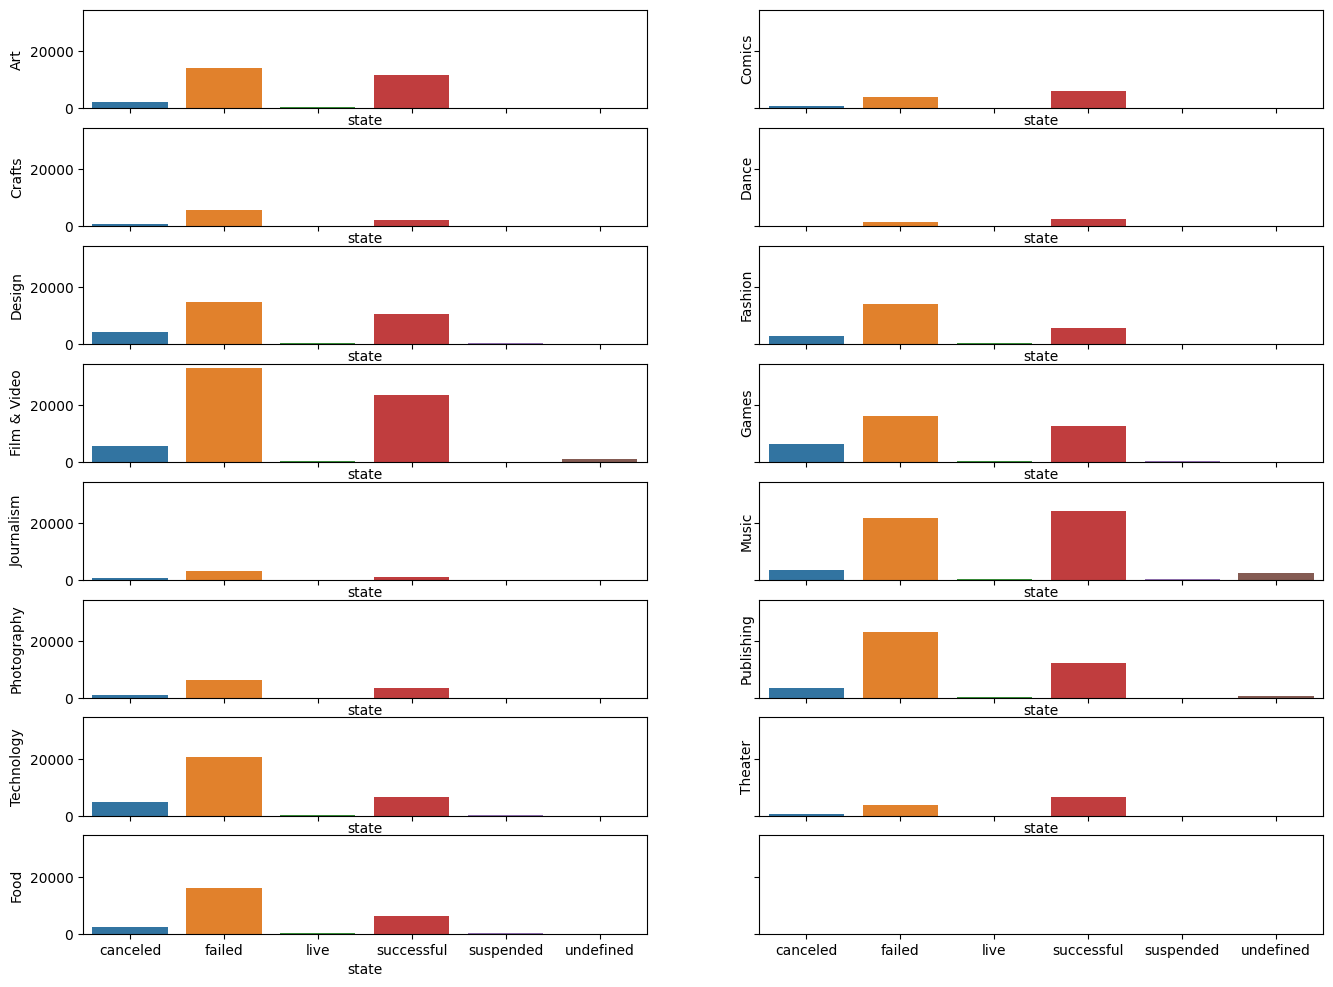

In [ ]:
plt.style.use('default')
fig = plt.figure(figsize=(16, 12))
axes = fig.subplots(8,2, sharex=True, sharey=True)

sns.barplot(crosstab.loc['Art'].index, crosstab.loc['Art'] , ax=axes[0, 0])
sns.barplot(crosstab.loc['Comics'].index, crosstab.loc['Comics'] , ax=axes[0, 1])
sns.barplot(crosstab.loc['Crafts'].index, crosstab.loc['Crafts'] , ax=axes[1, 0])
sns.barplot(crosstab.loc['Dance'].index, crosstab.loc['Dance'] , ax=axes[1, 1])
sns.barplot(crosstab.loc['Design'].index, crosstab.loc['Design'] , ax=axes[2, 0])
sns.barplot(crosstab.loc['Fashion'].index, crosstab.loc['Fashion'] , ax=axes[2, 1])
sns.barplot(crosstab.loc['Film & Video'].index, crosstab.loc['Film & Video'] , ax=axes[3, 0])
sns.barplot(crosstab.loc['Games'].index, crosstab.loc['Games'] , ax=axes[3, 1])
sns.barplot(crosstab.loc['Journalism'].index, crosstab.loc['Journalism'] , ax=axes[4, 0])
sns.barplot(crosstab.loc['Music'].index, crosstab.loc['Music'] , ax=axes[4, 1])
sns.barplot(crosstab.loc['Photography'].index, crosstab.loc['Photography'] , ax=axes[5, 0])
sns.barplot(crosstab.loc['Publishing'].index, crosstab.loc['Publishing'] , ax=axes[5, 1])
sns.barplot(crosstab.loc['Technology'].index, crosstab.loc['Technology'] , ax=axes[6, 0])
sns.barplot(crosstab.loc['Theater'].index, crosstab.loc['Theater'] , ax=axes[6, 1])
sns.barplot(crosstab.loc['Food'].index, crosstab.loc['Food'] , ax=axes[7, 0]);



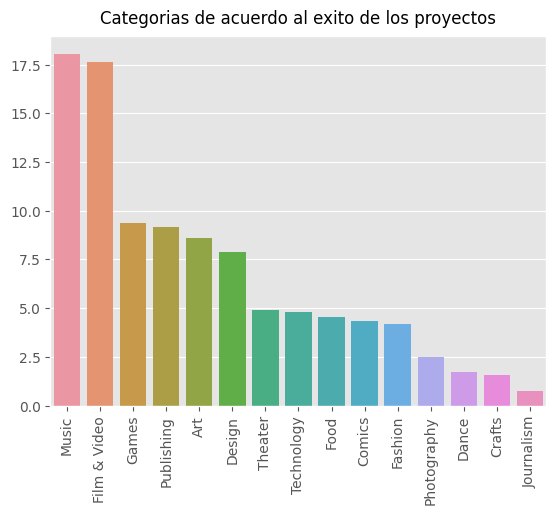

In [ ]:
plt.style.use('ggplot')
successful = df[df['state'] == 'successful']['main_category'].value_counts()
successful_porcentaje = successful * 100 / successful.sum()
success_bar = sns.barplot(successful_porcentaje.index, successful_porcentaje)
success_bar.set_title('Categorias de acuerdo al exito de los proyectos', fontsize=12, pad=9 )
success_bar.set_ylabel('')
success_bar.set_xticklabels(success_bar.get_xticklabels(), rotation=90);


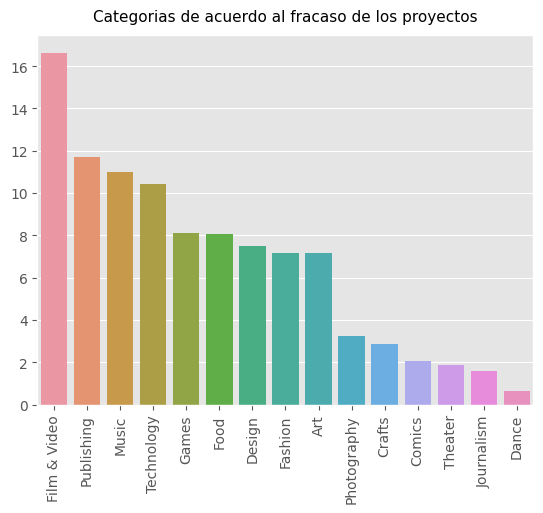

In [ ]:
failed = df[df['state'] == 'failed']['main_category'].value_counts()
failed_porcentaje = failed * 100 / failed.sum()
failed_bar =  sns.barplot(failed_porcentaje.index, failed_porcentaje)
failed_bar.set_title('Categorias de acuerdo al fracaso de los proyectos', fontsize=11, pad=10)
failed_bar.set_ylabel('')
failed_bar.set_xticklabels(failed_bar.get_xticklabels(), rotation=90);



In [ ]:
df_grouped = df.groupby('name')['main_category','category', 'state'].max()
df_grouped['count'] = 1



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
df_success_failed = df_grouped[df_grouped['state'].isin(['successful', 'failed'])]
df_top = df_success_failed['category'].value_counts().head(15)
df_top_15 = df_success_failed[df_success_failed['category'].isin(df_top.index)]




In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.0MB 316kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
fig = px.treemap(df_top_15, path = ['main_category', 'category', 'state'], values='count')
fig.show()